In [36]:
# Import Libraries 
from plantcv import plantcv as pcv
%matplotlib inline
# import os
# import sys
# sys.path.append('/home/user/plantcv')
import numpy as np
import cv2
# Set variables
pcv.params.debug = 'plot'                     # Plot debug images to the notebook

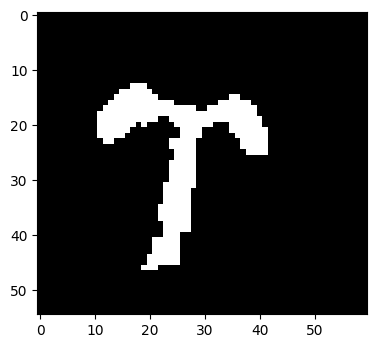

In [37]:
img, path, filename = pcv.readimage(filename="/mnt/f/proj_5551/masked3.png")

In [38]:
# Crop the mask 
cropped_mask = img # [0:50, 30:50]

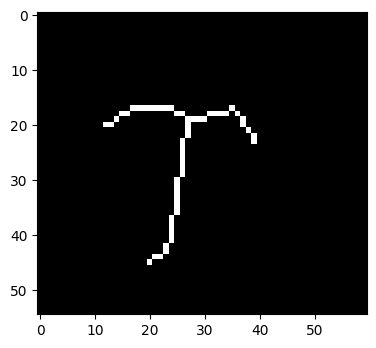

In [39]:
skeleton = pcv.morphology.skeletonize(mask=cropped_mask)

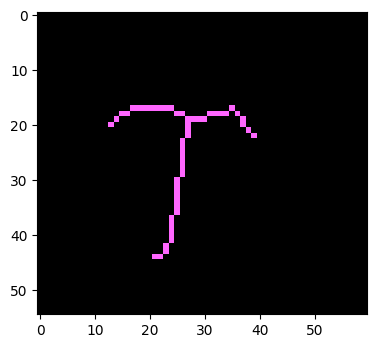

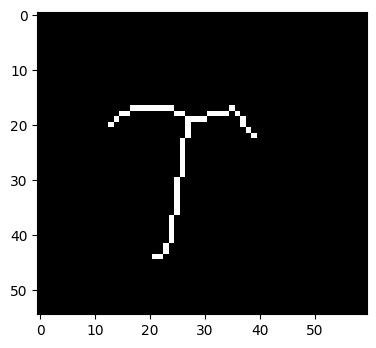

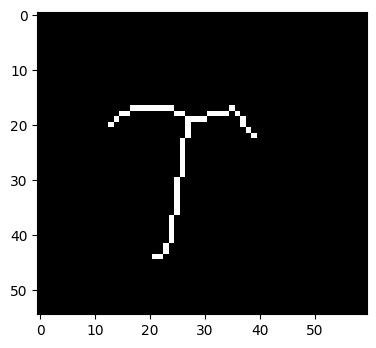

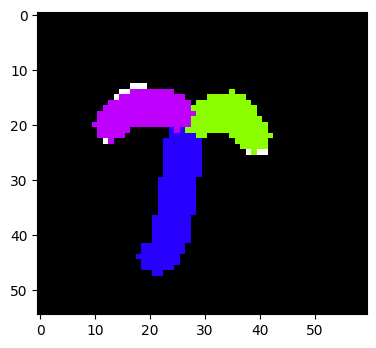

In [40]:
# Prune the skeleton  
# Generally, skeletonized images will have barbs (this image is particularly ideal, 
# that's why it's the example image in the tutorial!), 
# representing the width, that need to get pruned off. 

# Inputs:
#   skel_img = Skeletonized image
#   size     = Size to get pruned off each branch
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=10, mask=cropped_mask)

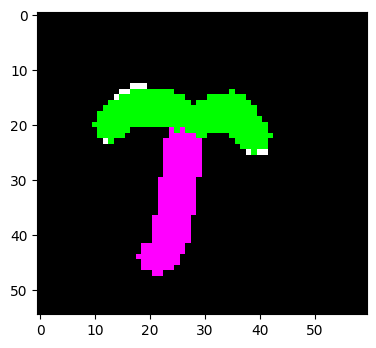

In [41]:
# Sort segments into primary (stem) objects and secondary (leaf) objects. 
# Downstream steps can be performed on just one class of objects at a time, 
# or all objects (output from segment_skeleton) 
  
# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.
leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, 
                                                 objects=edge_objects,
                                                    mask=cropped_mask)